# EDA AND PREPROCESSING

This dataset belongs to Open University Online Learning Platform (Also called as "Virtual Learning Environment(VLE)") that off-campus students use for accessing the course content, forum discussions, sending assessments and checking out assignment marks etc. It consists of 7 selected courses (mentioned as modules in the dataset). Different presentations indicated with letters "B" and "J" after year for semester 2 and semester 1 respectively.

Additionally, the dataset includes student demographics such as location, age group, disability, education level, gender etc.
Student assessment marks, interactions with the Virtual Learning Environment (VLE) are also included.


# **Import Libraries**

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# **Read Files**

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_info = pd.read_csv('studentInfo.csv')
student_registration = pd.read_csv('studentRegistration.csv')
vle = pd.read_csv('vle.csv')
student_vle = pd.read_csv('studentVle.csv')

# **Data Understanding On 7 Files**

**Assessments**

In [3]:
#ّFirst file
print(assessments)
print('===='*30)
assessments.info()

    code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight  
0      10.0  
1      20.0  
2      20.0  
3      20.0  
4      30.0  
..      ...  
2

The first part of the output shows the content of the Assessments DataFrame. This DataFrame contains 206 rows and 6 columns, with the columns being:

code_module: The code for the module.

code_presentation: The presentation code, likely indicating the year and term.

id_assessment: A unique identifier for each assessment.

assessment_type: The type of assessment (e.g., TMA - Tutor Marked Assignment, CMA - Computer Marked Assignment, Exam).

date: The date of the assessment in numeric form (days since the start of the course). weight: The weight of the assessment towards the final grade.

The second part of the output provides a summary of the DataFrame's structure and it shows that there is a few days that we don't have any exam.

In [4]:
# Count the number of NaN values in each column
print('count the number of nan values for each column:')
print("-------"*10)
nan_count = assessments.isna().sum()

# Print the result
print(nan_count)
print("-------"*10)

count the number of nan values for each column:
----------------------------------------------------------------------
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
----------------------------------------------------------------------


There was no exam for 11 days

Mean: 145.00512820512822
Median: 152.0
Mode: 222.0


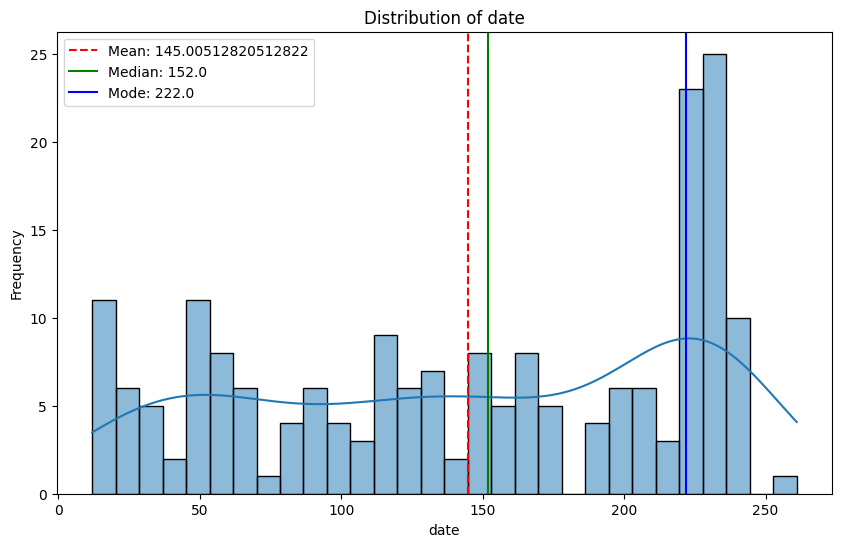

In [5]:
# Specify the column of interest
column = 'date'

# Drop NaN values in the specified column
df_assessments = assessments.dropna(subset=[column])

# Calculate mean, median, and mode
mean_value = df_assessments[column].mean()
median_value = df_assessments[column].median()
mode_value = df_assessments[column].mode().iloc[0]

# Print mean, median, and mode
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_assessments[column], kde=True, bins=30)
plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
plt.axvline(mode_value, color='b', linestyle='-', label=f'Mode: {mode_value}')
plt.legend()
plt.show()

The image indeed shows the distribution of assignment submission dates. The mean (average) submission date is around 145 days, and the median is at 150 days. These values suggest that most assignments are submitted around this time frame.

However, the mode (most frequent value), which is at 220 days, indicates that there’s a significant number of assignments being submitted much later. This could be due to various reasons such as assignment difficulty, student procrastination, or perhaps extensions being granted.

In [6]:
df_assessments.drop(['date','weight'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

Course C have 2 final exams. Course A doesn't have any Computer Marked Assessment (CMA). Each course has at least 3 TMAs.

In [7]:
df_assessments.drop(['id_assessment'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).agg(['min','max'])

date        weight       
                                                 min    max    min    max
code_module assessment_type code_presentation                            
AAA         TMA             2013J               19.0  215.0   10.0   30.0
                            2014J               19.0  215.0   10.0   30.0
BBB         CMA             2013B               54.0  187.0    1.0    1.0
                            2013J               54.0  208.0    1.0    1.0
                            2014B               47.0  194.0    1.0    1.0
            TMA             2013B               19.0  187.0    5.0   18.0
                            2013J               19.0  208.0    5.0   18.0
                            2014B               12.0  194.0    5.0   18.0
                            2014J               19.0  201.0    0.0   35.0
CCC         CMA             2014B               18.0  207.0    2.0    8.0
                            2014J               18.0  214.0    2.0    8.0
            TMA             2014B               32.0  200.0    9.0   22.0
                            2014J               32.0  207.0    9.0   22.0
DDD         CMA             2013B               23.0  206.0    2.0    6.0
            Exam            2013B              240.0  240.0  100.0  100.0
                            2013J              261.0  261.0  100.0  100.0
                            2014B              241.0  241.0  100.0  100.0
            TMA             2013B               25.0  200.0    7.5   15.0
                            2013J               25.0  207.0   10.0   20.0
                            2014B               25.0  200.0   10.0   20.0
                            2014J               20.0  195.0    5.0   25.0
EEE         Exam            2013J              235.0  235.0  100.0  100.0
                            2014B              228.0  228.0  100.0  100.0
                            2014J              235.0  235.0  100.0  100.0
            TMA             2013J               33.0  159.0   16.0   28.0
                            2014B               33.0  152.0   16.0   28.0
                            2014J               33.0  166.0   16.0   28.0
FFF         CMA             2013B              222.0  222.0    0.0    0.0
                            2013J              236.0  236.0    0.0    0.0
                            2014B              227.0  227.0    0.0    0.0
                            2014J              241.0  241.0    0.0    0.0
            Exam            2013B              222.0  222.0  100.0  100.0
                            2013J              236.0  236.0  100.0  100.0
                            2014B              227.0  227.0  100.0  100.0
                            2014J              241.0  241.0  100.0  100.0
            TMA             2013B               19.0  166.0   12.5   25.0
                            2013J               19.0  173.0   12.5   25.0
                            2014B               24.0  171.0   12.5   25.0
                            2014J               24.0  199.0   12.5   25.0
GGG         CMA             2013J              229.0  229.0    0.0    0.0
                            2014B              222.0  222.0    0.0    0.0
                            2014J              229.0  229.0    0.0    0.0
            Exam            2013J              229.0  229.0  100.0  100.0
                            2014B              222.0  222.0  100.0  100.0
                            2014J              229.0  229.0  100.0  100.0
            TMA             2013J               61.0  173.0    0.0    0.0
                            2014B               61.0  166.0    0.0    0.0
                            2014J               61.0  173.0    0.0    0.0

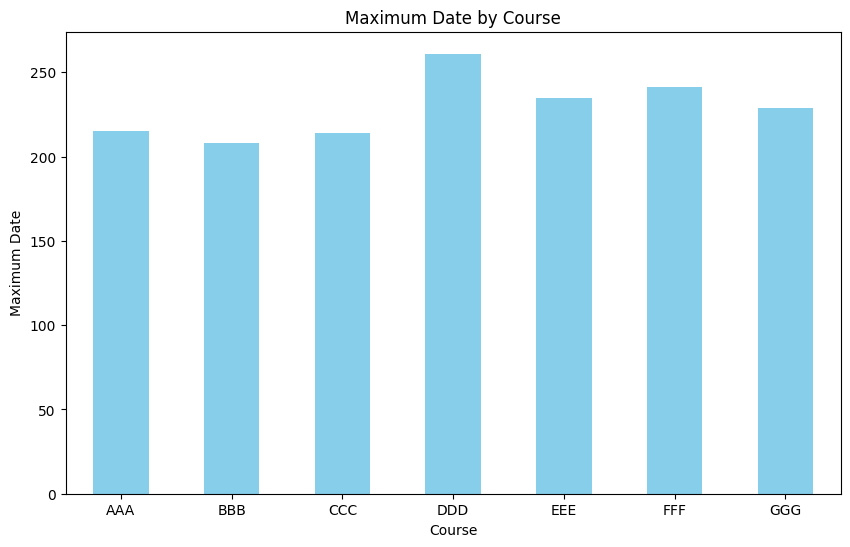

In [8]:
# Drop the 'id_assessment' column and group by 'code_module', 'assessment_type', and 'code_presentation'
agg_df = df_assessments.drop(['id_assessment'], axis=1).groupby(
    ['code_module', 'assessment_type', 'code_presentation']
).agg(['min', 'max'])

# Flatten the MultiIndex columns
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]

# Reset the index for easier plotting
agg_df.reset_index(inplace=True)

# Find the maximum date per course
max_dates = agg_df.groupby('code_module')['date_max'].max()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
max_dates.plot(kind='bar', color='skyblue')
plt.title('Maximum Date by Course')
plt.xlabel('Course')
plt.ylabel('Maximum Date')
plt.xticks(rotation=0)
plt.show()

Course DDD has the highest latency in submitting the assignment which can be due to the difficulty of the exam or professors' policy to collect the assignments in a specific way

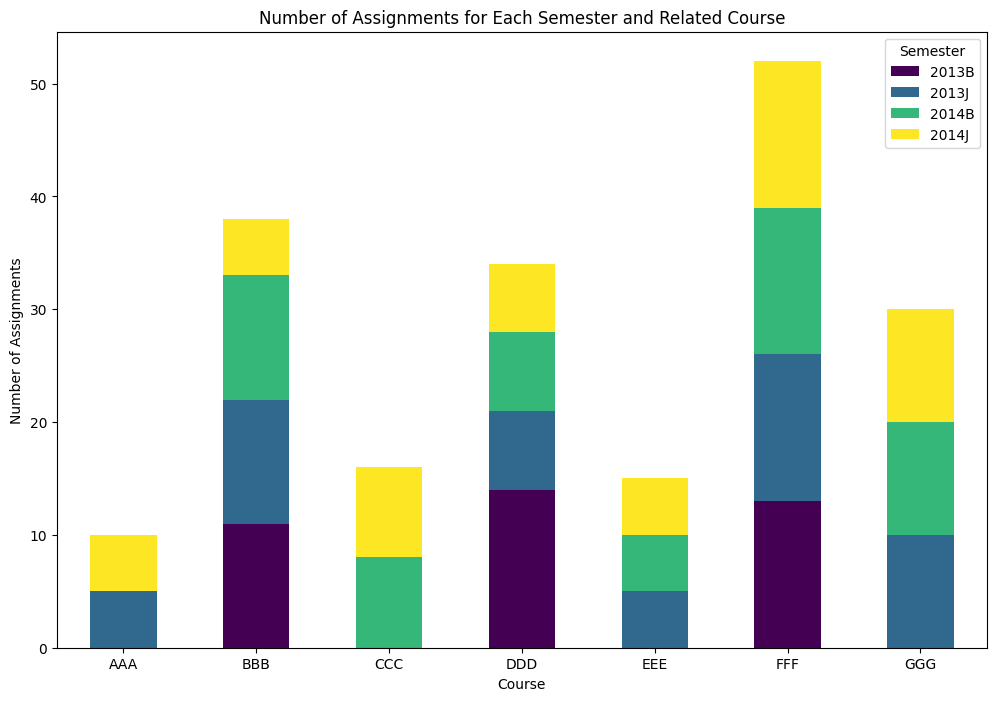

code_presentation  2013B  2013J  2014B  2014J
code_module                                  
AAA                  0.0    5.0    0.0    5.0
BBB                 11.0   11.0   11.0    5.0
CCC                  0.0    0.0    8.0    8.0
DDD                 14.0    7.0    7.0    6.0
EEE                  0.0    5.0    5.0    5.0
FFF                 13.0   13.0   13.0   13.0
GGG                  0.0   10.0   10.0   10.0


In [9]:
# Group by 'code_module' and 'code_presentation' to count the number of assessments
assignments_count = df_assessments.groupby(['code_module', 'code_presentation']).size().reset_index(name='count')

# Create a pivot table for better visualization in a table format
pivot_table = assignments_count.pivot(index='code_module', columns='code_presentation', values='count').fillna(0)

# Plotting the bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Number of Assignments for Each Semester and Related Course')
plt.xlabel('Course')
plt.ylabel('Number of Assignments')
plt.xticks(rotation=0)
plt.legend(title='Semester')
plt.show()

# Display the pivot table
print(pivot_table)

The bar plot shows assignment counts for each course across semesters, with colors representing different semesters.

Courses like FFF have a consistent number of assignments (13) across all semesters.

Some courses, such as AAA, have assignments only in specific semesters (2013J and 2014J).

BBB and FFF show high and consistent assignment numbers.

Variations suggest possible curriculum or assessment policy changes over time.

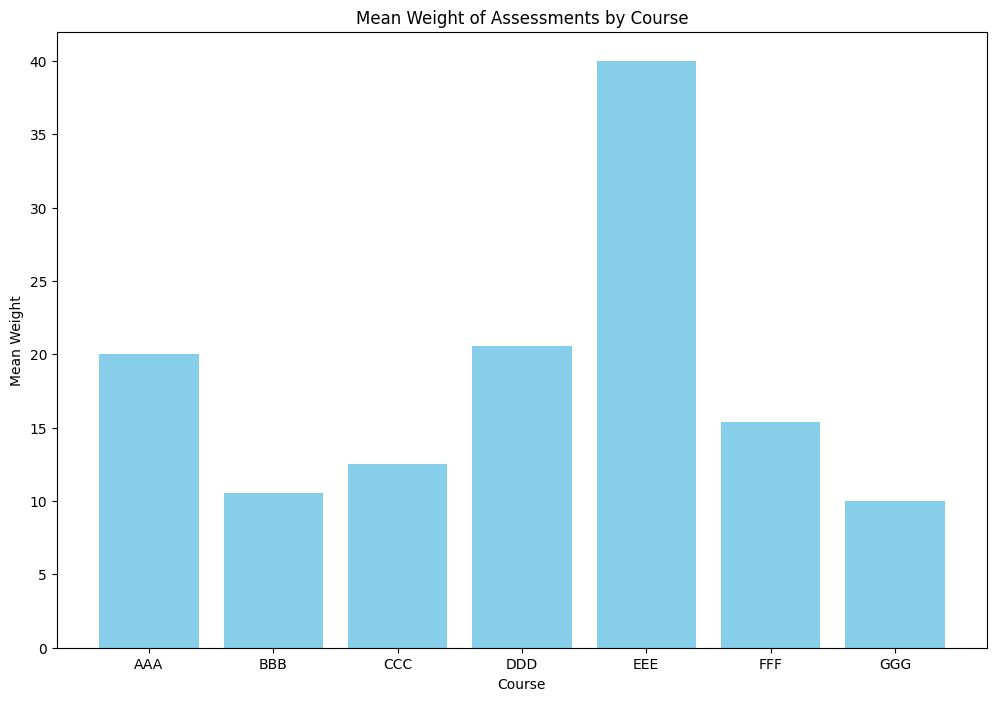

  code_module     weight
0         AAA  20.000000
1         BBB  10.526316
2         CCC  12.500000
3         DDD  20.588235
4         EEE  40.000000
5         FFF  15.384615
6         GGG  10.000000


In [10]:
# Group by 'code_module' and calculate the mean of weights
weights_mean = df_assessments.groupby('code_module')['weight'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(weights_mean['code_module'], weights_mean['weight'], color='skyblue')
plt.title('Mean Weight of Assessments by Course')
plt.xlabel('Course')
plt.ylabel('Mean Weight')
plt.xticks(rotation=0)
plt.show()

# Display the weights table
print(weights_mean)

Overall Distribution: The bar plot shows average assessment weights per course.

Highest Weight: EEE has the highest mean weight (40.0), indicating significant assessments.

Lowest Weight: GGG has the lowest mean weight (10.0), indicating less impactful assessments.

Moderate Weights: Courses like AAA, DDD, and FFF have moderate weights (15.4 to 20.6).

Lower Weights: BBB and CCC have lower mean weights (10.5 and 12.5), suggesting frequent, less impactful assessments.

Implications: Different courses use varied assessment strategies, likely reflecting course objectives and content difficulty.

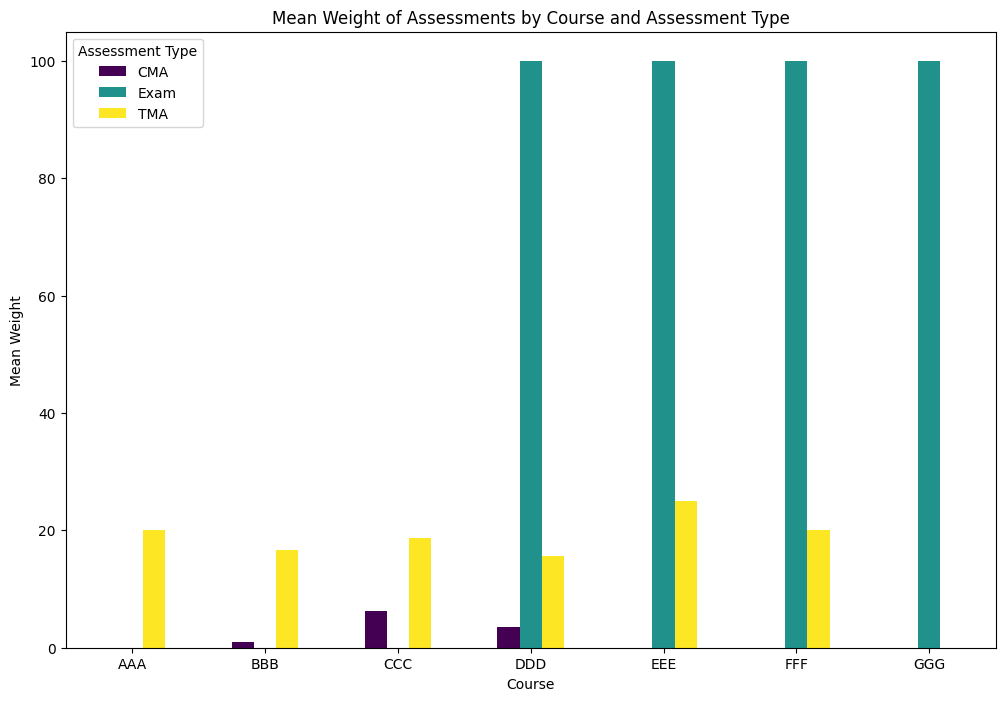

assessment_type       CMA   Exam       TMA
code_module                               
AAA                   NaN    NaN  20.00000
BBB              1.000000    NaN  16.73913
CCC              6.250000    NaN  18.75000
DDD              3.571429  100.0  15.62500
EEE                   NaN  100.0  25.00000
FFF              0.000000  100.0  20.00000
GGG              0.000000  100.0   0.00000


In [11]:
# Group by 'code_module' and 'assessment_type' and calculate the mean of weights
weights_mean = df_assessments.groupby(['code_module', 'assessment_type'])['weight'].mean().unstack()

# Plotting the bar plot
weights_mean.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Mean Weight of Assessments by Course and Assessment Type')
plt.xlabel('Course')
plt.ylabel('Mean Weight')
plt.xticks(rotation=0)
plt.legend(title='Assessment Type')
plt.show()

# Display the weights table
print(weights_mean)

The analysis of the mean weight of assessments by course and assessment type reveals that courses DDD, EEE, FFF, and GGG heavily weight exams, each with a mean weight of 100, indicating a significant impact on final grades. TMAs (Tutor-Marked Assignments) are notably weighted across most courses, with EEE having the highest at 25.0, underscoring their importance in these courses. In contrast, CMAs (Computer-Marked Assignments) are less emphasized, with CCC having a relatively higher mean weight of 6.25. Courses AAA, BBB, and CCC primarily utilize TMAs with moderate weights, while DDD, EEE, FFF, and GGG rely extensively on exams. This variation in assessment weights reflects different evaluation strategies and emphasizes across courses, providing insights into the overall assessment approach in each course.

EXCEL 2

COURSES

In [12]:
#Second file
courses = pd.read_csv('courses.csv')
print(courses)
print('===='*30)
courses.info()

   code_module code_presentation  module_presentation_length
0          AAA             2013J                         268
1          AAA             2014J                         269
2          BBB             2013J                         268
3          BBB             2014J                         262
4          BBB             2013B                         240
5          BBB             2014B                         234
6          CCC             2014J                         269
7          CCC             2014B                         241
8          DDD             2013J                         261
9          DDD             2014J                         262
10         DDD             2013B                         240
11         DDD             2014B                         241
12         EEE             2013J                         268
13         EEE             2014J                         269
14         EEE             2014B                         241
15         FFF          

The courses dataset contains information about various courses offered, their respective code modules, presentations, and the length of each module presentation.

Columns:

code_module: Identifier for the course module.

code_presentation: Identifier for the course presentation.

module_presentation_length: Length of the course presentation in days.

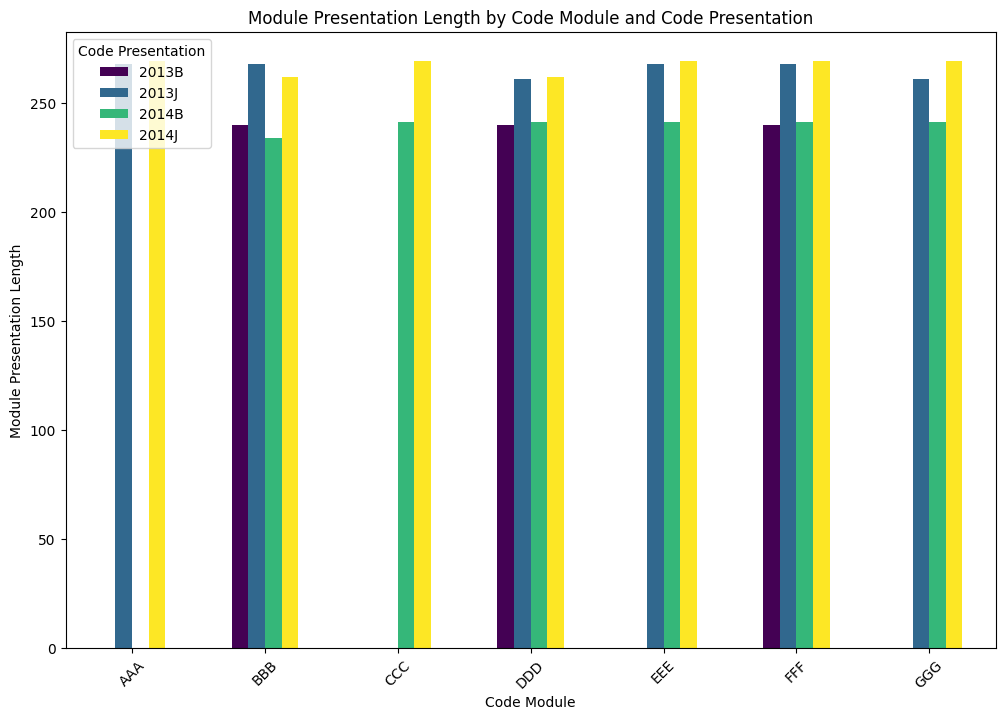

In [13]:
# Create a pivot table to separate code_presentation
pivot_table = courses.pivot(index='code_module', columns='code_presentation', values='module_presentation_length')

# Plotting the bar plot
pivot_table.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Module Presentation Length by Code Module and Code Presentation')
plt.xlabel('Code Module')
plt.ylabel('Module Presentation Length')
plt.xticks(rotation=45)
plt.legend(title='Code Presentation')
plt.show()

This bar char shows that semesters which startet first are about 25 days longer than the second semester

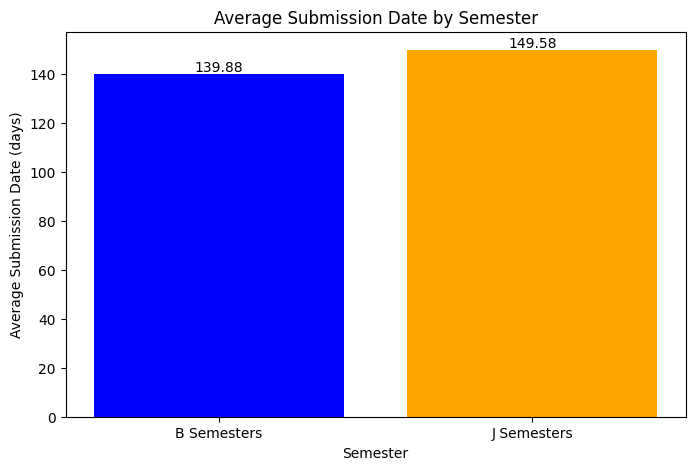

In [14]:
# Merge the dataframes on `code_module` and `code_presentation`
merged_df = pd.merge(df_assessments,courses, on=['code_module', 'code_presentation'])

# Extract the semester type (e.g., "J" or "B") from `code_presentation`
merged_df['semester'] = merged_df['code_presentation'].str[-1]

# Group by semester and calculate the average submission date
avg_submission_dates = merged_df.groupby('semester')['date'].mean().reset_index()

avg_submission_dates


# Plot the average submission dates in a bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_submission_dates['semester'], avg_submission_dates['date'], color=['blue', 'orange'])
plt.xlabel('Semester')
plt.ylabel('Average Submission Date (days)')
plt.title('Average Submission Date by Semester')
plt.xticks(ticks=avg_submission_dates['semester'], labels=['B Semesters', 'J Semesters'])

# Display the values on top of the bars
for index, value in enumerate(avg_submission_dates['date']):
    plt.text(index, value + 1, f'{value:.2f}', ha='center')

plt.show()

The bar chart compares the average submission dates between B semesters and J semesters. The average submission date for B semesters is approximately 139.88 days, while for J semesters, it is around 149.58 days. This indicates that on average, submissions in J semesters occur later than those in B semesters. This analysis helps in understanding the distribution of assignment deadlines across different semesters.

EXCEL 3

studentAssessment

In [15]:
#Third file
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment.info()
studentAssessment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Most students scored between 65 and 90, with an average score of around 75.80. The standard deviation in scores suggests moderate variability. The is_banked column has a low mean value, showing that most assessments are not banked. The dataset comprises 173,912 entries with 5 columns: id_assessment, id_student, date_submitted, is_banked, and score. All columns except score have no missing values. The score column has 173,739 non-null entries, indicating some missing values. Data types include integers for IDs, submission dates, and banking status, and float for scores. The memory usage of the dataset is approximately 6.6 MB.

In [16]:
#Checking missing values
print(studentAssessment.isnull().sum())
print("******************************")
# Checking the number of duplicate rows
print(studentAssessment.duplicated().sum())

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
******************************
0


In [17]:
# Print the data types of each column
print(studentAssessment.dtypes)

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object


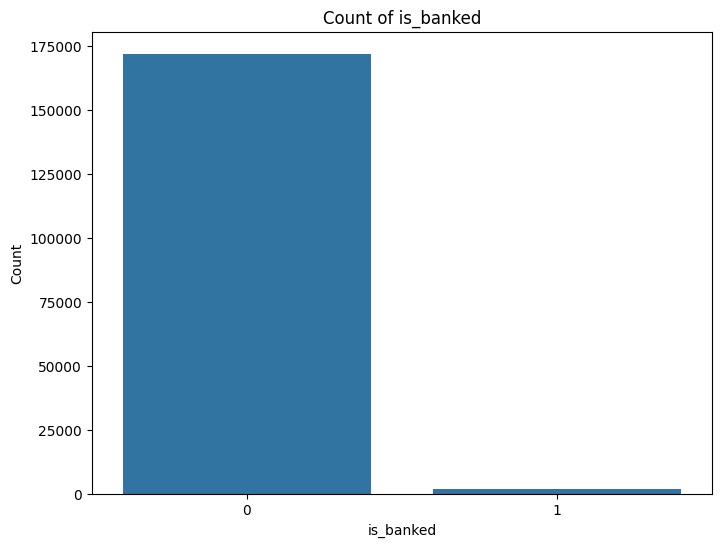

In [18]:
# Plotting the bar plot for is_banked
plt.figure(figsize=(8, 6))
sns.countplot(data=studentAssessment, x='is_banked')
plt.title('Count of is_banked')
plt.xlabel('is_banked')
plt.ylabel('Count')
plt.show()

Mean: 75.7995729226023
Median: 80.0
Mode: 100.0


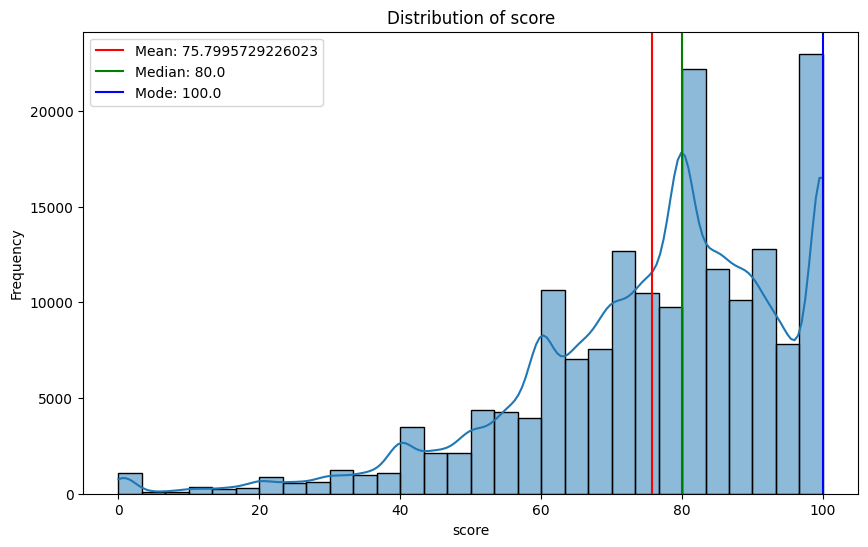

In [19]:
#Specify the column of interest
column = "score"

# Drop NaN values from the 'score' column
df_studentAssessment = studentAssessment.dropna(subset=[column])

# Calculate statistics
mean_score = df_studentAssessment[column].mean()
median_score = df_studentAssessment[column].median()
mode_score = df_studentAssessment[column].mode().iloc[0]
#mode_score = mode_result.mode[0] if mode_result.mode.size > 0 else np.nan

# Print statistics
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_studentAssessment[column], kde=True, bins=30)
plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.axvline(mean_score, color='r', linestyle='-', label=f'Mean: {mean_score}')
plt.axvline(median_score, color='g', linestyle='-', label=f'Median: {median_score}')
plt.axvline(mode_score, color='b', linestyle='-', label=f'Mode: {mode_score}')
plt.legend()
plt.show()

The histogram illustrates the distribution of scores in the dataset. The mean score is approximately 75.80, represented by the red dashed line, while the median score is 80.0, shown by the green dashed line. The mode of the scores is 100.0, indicated by the blue dashed line. The distribution is right-skewed, with a noticeable peak around 80 and a significant number of scores at 100. This indicates that while many students scored high, a broad range of lower scores is also present.

Mean: 116.03294194765168
Median: 116.0
Mode: 18


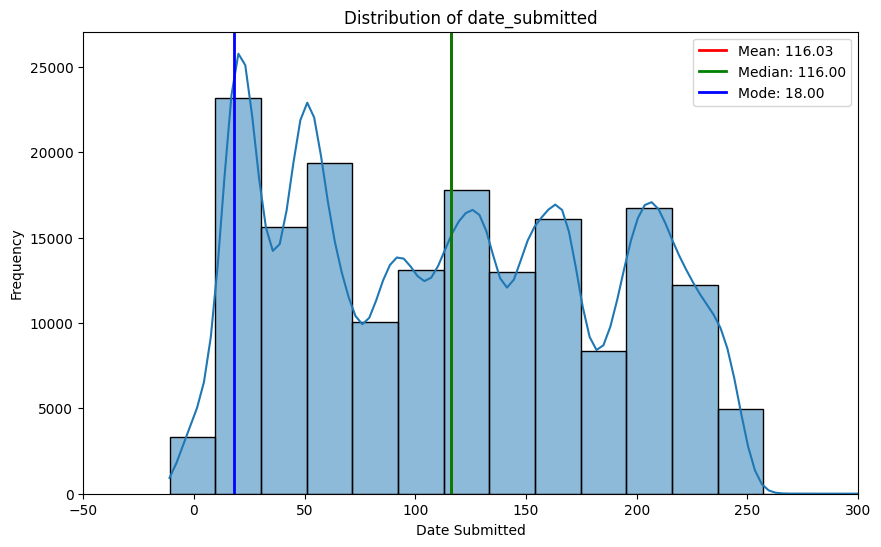

In [20]:
# Calculating mean, median, and mode
mean_value = studentAssessment['date_submitted'].mean()
median_value = studentAssessment['date_submitted'].median()
mode_value = studentAssessment['date_submitted'].mode()[0]

# Printing the values
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Plotting the histogram for date_submitted with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(studentAssessment['date_submitted'], bins=30, kde=True)

# Adding vertical lines for mean, median, and mode
plt.axvline(mean_value, color='r', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='b', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')

# Customizing the plot
plt.title('Distribution of date_submitted')
plt.xlabel('Date Submitted')
plt.ylabel('Frequency')
plt.xlim(-50, 300)  # Setting the x-axis limits to display from -50 to 300
plt.legend()
plt.show()

The histogram shows the distribution of submission dates for assessments. The mean and median submission dates are both approximately 116 days, marked by the red and green dashed lines, respectively. The mode of the submission dates is 18 days, shown by the blue dashed line. The data exhibits a broad range of submission dates with multiple peaks, indicating variability in when assessments were submitted. The distribution is relatively symmetrical around the mean and median.

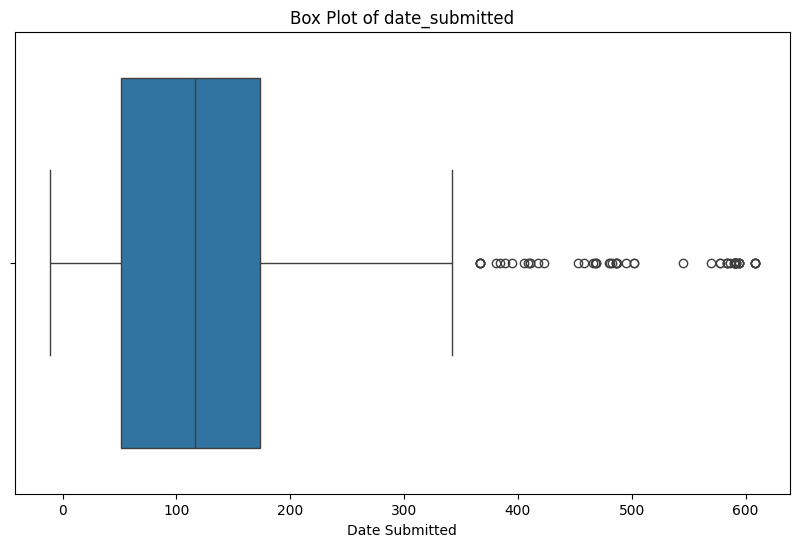

In [21]:
# Plotting the box plot for date_submitted
plt.figure(figsize=(10, 6))
sns.boxplot(data=studentAssessment, x='date_submitted')
plt.title('Box Plot of date_submitted')
plt.xlabel('Date Submitted')
plt.show()

The box plot of date_submitted displays the central tendency and variability of the data, with a median around 100 and an interquartile range spanning approximately 50 to 200. The presence of numerous outliers beyond the upper whisker, particularly after 300, indicates that there are several submissions significantly later than the majority. The overall distribution suggests that while most submissions occur within a specific timeframe, there are exceptional cases with considerably later dates.

In [22]:
# Calculate the number of unique id_assessment values
num_unique_assessments = studentAssessment['id_assessment'].nunique()

# Print the result
print("Number of unique id_assessment values:", num_unique_assessments)
print("==="*30)
# Calculate the frequency of each id_assessment
assessment_freq = studentAssessment['id_assessment'].value_counts()

# Create a DataFrame to display id_assessment and its frequency
frequency_table = pd.DataFrame({
    'id_assessment': assessment_freq.index,
    'frequency': assessment_freq.values
})

# Display the table
print(frequency_table)

Number of unique id_assessment values: 188
     id_assessment  frequency
0            24295       1917
1            34873       1859
2            34899       1826
3            15020       1776
4            14996       1695
..             ...        ...
183           1760        304
184           1755        303
185           1756        298
186           1761        280
187           1762        278

[188 rows x 2 columns]


In [23]:
# Calculate mean score for each id_assessment
mean_scores = studentAssessment.groupby('id_assessment')['score'].mean().reset_index()

# Rename columns
mean_scores.columns = ['g_id_assessment', 'meanScore']

# Create a new DataFrame
new_dataframe = pd.DataFrame(mean_scores)

# Print the new DataFrame
print(new_dataframe)

     g_id_assessment  meanScore
0               1752  70.307263
1               1753  66.801170
2               1754  70.439394
3               1755  70.567657
4               1756  69.127517
..               ...        ...
183            37439  86.071429
184            37440  84.308977
185            37441  91.923890
186            37442  75.480769
187            37443  85.348837

[188 rows x 2 columns]


EXCEL 4


studentInfo

In [24]:
#Fourth file
studentInfo = pd.read_csv('studentInfo.csv')
print(studentInfo)
print('===='*30)
studentInfo.info()

      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band a

In [25]:
# Count the number of NaN values in each column
assessments = pd.read_csv('assessments.csv')
print('count the number of nan values for each column:')
print("-------"*10)
nan_count = assessments.isna().sum()

# Print the result
print(nan_count)
print("-------"*10)

count the number of nan values for each column:
----------------------------------------------------------------------
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
----------------------------------------------------------------------




Mean: 79.75869051636855
Median: 60.0
Mode: 60


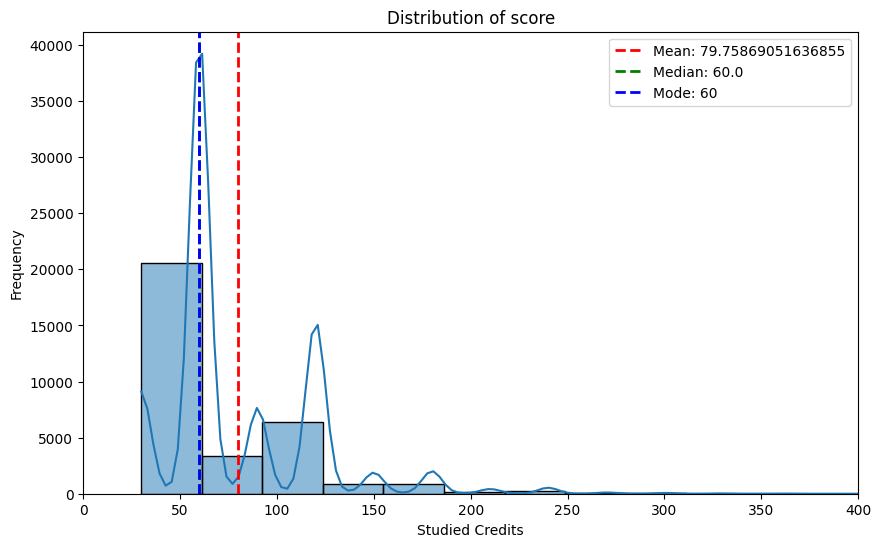

In [26]:
import plotly.express as px
# Calculate statistics
mean_value = studentInfo['studied_credits'].mean()
median_value = studentInfo['studied_credits'].median()
mode_value = studentInfo['studied_credits'].mode()[0]

# Print statistics
print("\n")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print('===='*30)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(studentInfo['studied_credits'], bins=20, kde=True)

# Add lines for mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

# Add legend and titles
plt.xlim(0, 400)
plt.legend()
plt.title(f'Distribution of {column}')
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')

# Show plot
plt.show()

Mean: 0.16322523241186757
Median: 0.0
Mode: 0


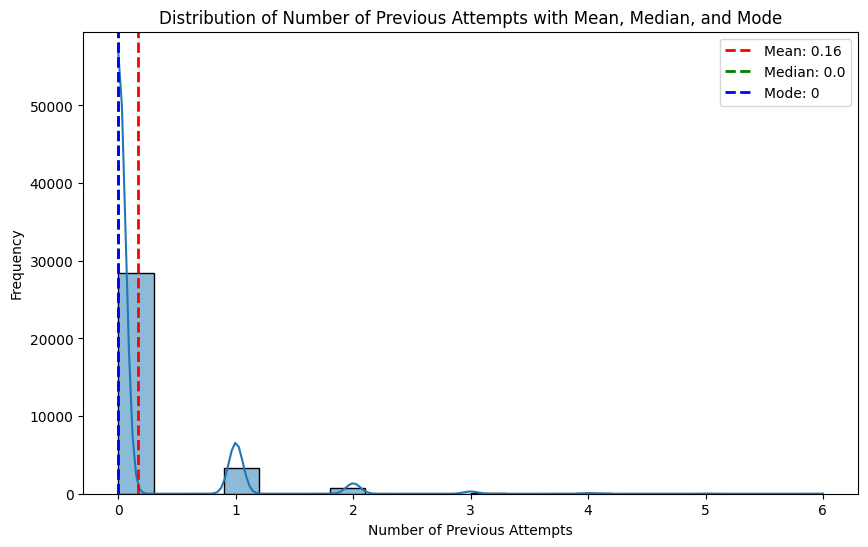

In [27]:
# Calculate statistics
mean_value = studentInfo['num_of_prev_attempts'].mean()
median_value = studentInfo['num_of_prev_attempts'].median()
mode_value = studentInfo['num_of_prev_attempts'].mode()[0]

# Print statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print('===='*30)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(studentInfo['num_of_prev_attempts'], bins=20, kde=True)

# Add lines for mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

# Add legend and titles
plt.legend()
plt.title('Distribution of Number of Previous Attempts with Mean, Median, and Mode')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Frequency')

# Show plot
plt.show()

For the distribution of Score and Number of Previous Attempts, we calculate the mean, median, and mode. The bar plot we create here does not reveal an obvious distribution. We cannot interpret it effectively because the values do not follow a clear pattern.

In [28]:
studentInfo.drop(['num_of_prev_attempts', 'studied_credits'],axis = 1).groupby(['code_module', 'code_presentation']).count()

id_student  gender  region  highest_education  \
code_module code_presentation                                                  
AAA         2013J                     383     383     383                383   
            2014J                     365     365     365                365   
BBB         2013B                    1767    1767    1767               1767   
            2013J                    2237    2237    2237               2237   
            2014B                    1613    1613    1613               1613   
            2014J                    2292    2292    2292               2292   
CCC         2014B                    1936    1936    1936               1936   
            2014J                    2498    2498    2498               2498   
DDD         2013B                    1303    1303    1303               1303   
            2013J                    1938    1938    1938               1938   
            2014B                    1228    1228    1228               1228   
            2014J                    1803    1803    1803               1803   
EEE         2013J                    1052    1052    1052               1052   
            2014B                     694     694     694                694   
            2014J                    1188    1188    1188               1188   
FFF         2013B                    1614    1614    1614               1614   
            2013J                    2283    2283    2283               2283   
            2014B                    1500    1500    1500               1500   
            2014J                    2365    2365    2365               2365   
GGG         2013J                     952     952     952                952   
            2014B                     833     833     833                833   
            2014J                     749     749     749                749   

                               imd_band  age_band  disability  final_result  
code_module code_presentation                                                
AAA         2013J                   368       383         383           383  
            2014J                   357       365         365           365  
BBB         2013B                  1746      1767        1767          1767  
            2013J                  2221      2237        2237          2237  
            2014B                  1600      1613        1613          1613  
            2014J                  2279      2292        2292          2292  
CCC         2014B                  1828      1936        1936          1936  
            2014J                  2352      2498        2498          2498  
DDD         2013B                  1242      1303        1303          1303  
            2013J                  1858      1938        1938          1938  
            2014B                  1170      1228        1228          1228  
            2014J                  1722      1803        1803          1803  
EEE         2013J                  1000      1052        1052          1052  
            2014B                   676       694         694           694  
            2014J                  1141      1188        1188          1188  
FFF         2013B                  1519      1614        1614          1614  
            2013J                  2182      2283        2283          2283  
            2014B                  1428      1500        1500          1500  
            2014J                  2266      2365        2365          2365  
GGG         2013J                   949       952         952           952  
            2014B                   830       833         833           833  
            2014J                   748       749         749           749

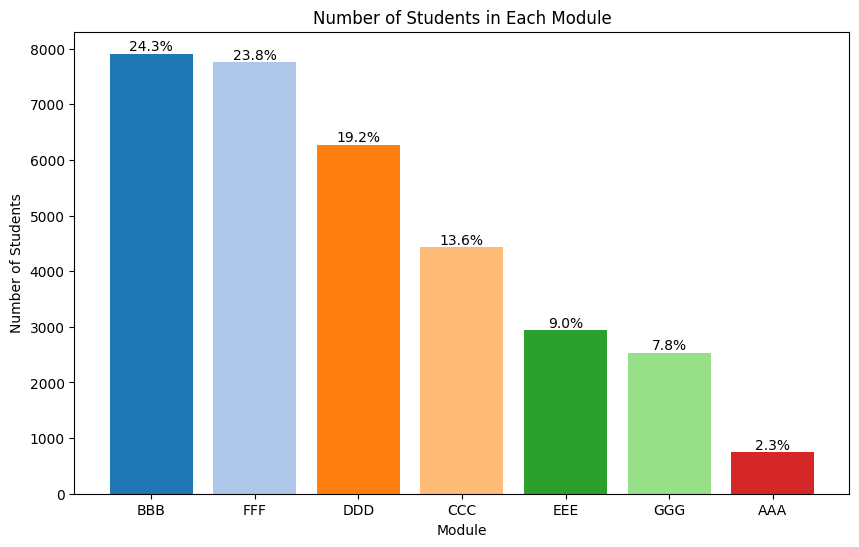

In [29]:
# Count the number of students in each module
module_counts = studentInfo['code_module'].value_counts()

# Calculate the percentage of students in each module
module_percentages = (module_counts / module_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(module_counts.index, module_counts, color=plt.cm.tab20.colors[:len(module_counts)])

# Add percentage labels above the bars
for bar, percentage in zip(bars, module_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Add titles and labels
plt.title('Number of Students in Each Module')
plt.xlabel('Module')
plt.ylabel('Number of Students')
plt.show()

This bar plot displays the number of students enrolled in each module, along with the percentage of the total student population represented by each module. The plot provides a clear visual comparison of student distribution across different modules. Each bar's height corresponds to the number of students, and the labels above the bars indicate the percentage of the total enrollment for each module. This helps in identifying which modules are more popular among students and can guide resource allocation and curriculum planning.

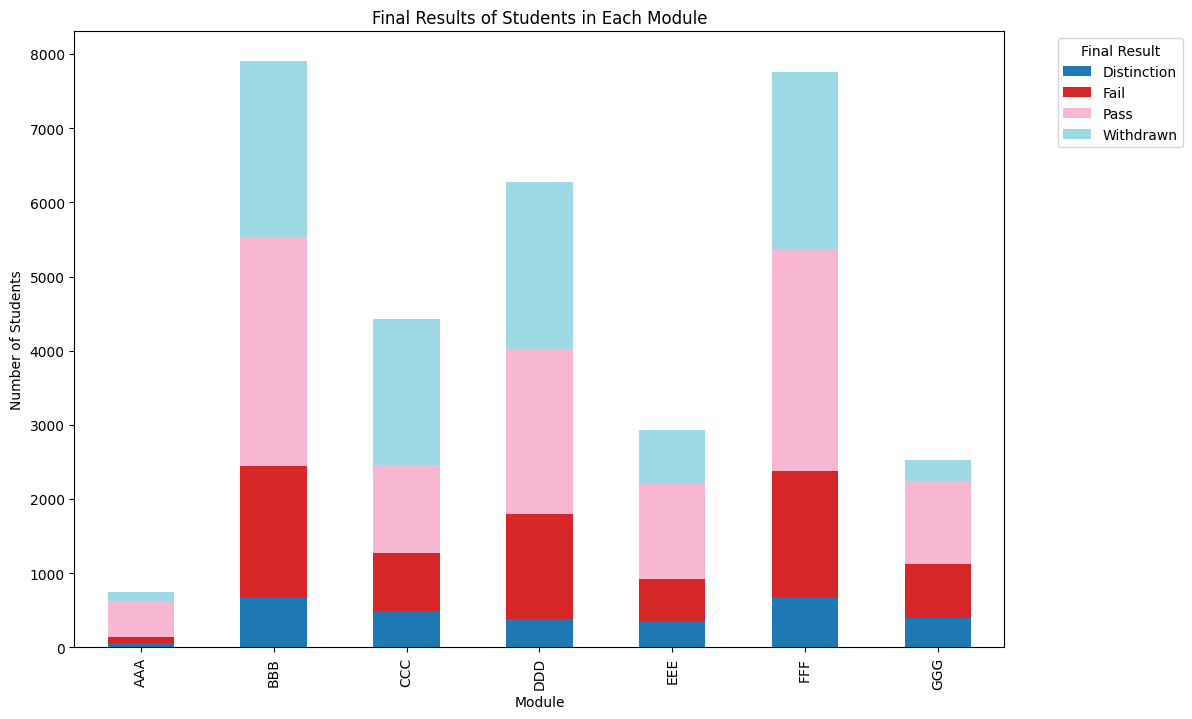

In [30]:
# Count the number of students in each module with each final result
module_final_result_counts = studentInfo.groupby(['code_module', 'final_result']).size().unstack(fill_value=0)

# Calculate the percentage of each final result within each module
module_final_result_percentages = module_final_result_counts.div(module_final_result_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
module_final_result_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Final Results of Students in Each Module')
plt.xlabel('Module')
plt.ylabel('Number of Students')
plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

The stacked bar plot shows the distribution of final results of students across different modules. Each bar represents a module, and the segments within each bar represent the number of students achieving each final result, such as 'Pass', 'Fail', 'Withdrawn', etc. The color-coded segments allow you to compare the proportion of different final results within each module. This visualization helps identify which modules have higher or lower pass rates, as well as the prevalence of other outcomes like failures or withdrawals. This information can be valuable for understanding the performance trends in each module and identifying areas that might need improvement or further investigation.

In [31]:
df = studentInfo.groupby(['code_module', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="code_module",
            hover_data=None, barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Pass and Fail Percentages by Module',
    xaxis_title="Result",
    yaxis_title="Percentage [%]",
    legend_title="Code Module",
    width=700,
    height=500,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)
fig

Certainly! The vertical bar plot represents different categories (AAA to GGG) with corresponding percentage values. AAA has the highest percentage (8.68%), while GGG has the lowest (0.03%). The colors indicate the categories, but the x-axis labels are not visible. Overall, it visually illustrates data distribution across these categories.

**Course presentation analysis**

In [32]:
Semester = studentInfo.groupby('code_presentation').agg({'id_student':'count'}).reset_index()

Semester['Percentage'] = Semester.apply(lambda x: round(100 * (x['id_student'] / Semester['id_student'].sum()),2), axis=1)

fig = px.bar(Semester, x='code_presentation', y='id_student', \
    text='Percentage', color='code_presentation',  hover_data=['id_student'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution Of Each Code Presentation',
    xaxis_title="Code Presentation",
    yaxis_title="Number Of Students",
    legend_title="Code Presentation",
    width=800,
    height=600,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)
fig.show()

The bar chart titled “Distribution Of Each Code Presentation” illustrates student enrollment across different code presentations for two consecutive years. Notably, the red bar (2014J) represents the highest enrollment at 34.55%, while the blue bar (2013B) corresponds to 14.37% of students. This visualization provides insights into enrollment trends over time.

In [33]:
df = studentInfo.groupby(['code_presentation', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="code_presentation",
            hover_data=['Percentage'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Results By Code Presentation',
    xaxis_title="Final Results",
    yaxis_title="Percentage [%]",
    legend_title="code_presentation",
    width=700,
    height=500,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)
fig.show()

The stacked bar chart titled “Final Results By Code Presentation” provides insights into student performance across different years and code presentations. Here are the key takeaways:

Distinction: The percentage of students achieving distinction increased from approximately 24% in 2013 to over 30% in the code_presentation year.
Fail: The fail rate decreased from around 28% in 2013 to about 25% in the code_presentation year.
Pass by Compensation: This category remained relatively stable across the years.
Withdrawn: The withdrawal rate decreased from approximately 37% in 2013 to around 34% in the code_presentation year.
Overall, the chart highlights trends in student outcomes, suggesting improvements in distinction and reductions in fail rates over time.

**Gender Analysis**

In [34]:
genero = studentInfo[['id_student', 'gender']].drop_duplicates().groupby('gender').\
    agg({'id_student':'count'}).reset_index()

genero['Percentage'] = genero.apply(lambda x: round(100 * (x['id_student'] / genero['id_student'].sum()),2), axis=1)

fig = px.bar(genero, x='gender', y='id_student', \
    text='id_student', color='gender',  hover_data=['id_student'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution Of Gender',
    xaxis_title="Gender",
    yaxis_title="Number Of Students",
    legend_title="Gender",
    width=600,
    height=400,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)
fig.show()

The bar chart shows “Distribution Of Gender” compares the number of students by gender. It features two bars: the blue bar represents female students (labeled ‘F’) with a count of 13,739, while the orange bar represents male students (labeled ‘M’) with a count of 15,046. The y-axis indicates the number of students, and the x-axis represents gender. Notably, there are more male students than female students in this dataset.

In [35]:
df = studentInfo.groupby(['gender', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="gender",
            hover_data=['Percentage'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Gender',
    xaxis_title="Final Result",
    yaxis_title="Percentage [%]",
    legend_title="Gender",
    width=600,
    height=400,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)
fig.show()

The bar chart titled “Final Result By Gender” compares the percentage of females (labeled ‘F’) and males (labeled ‘M’) in four categories of final results: Distinction, Fail, Pass, and Withdrawn. Here’s the breakdown:

Distinction: Approximately 53.9% are females, while 46.1% are males.
Fail: It’s an even split, with both genders at 50%.
Pass: Around 53.6% are females, and 46.4% are males.
Withdrawn: Approximately 55.83% are females compared to 44.17% males.
This chart suggests that in this context, a higher percentage of females achieve a distinction or pass their final result, while also having a slightly higher withdrawal rate.

Region  Analysis

In [36]:
regiao = studentInfo[['region', 'id_student']].drop_duplicates().groupby('region').agg({'id_student':'count'}).reset_index()

regiao['Percentage'] = regiao.apply(lambda x: round(100 * (x['id_student'] / regiao['id_student'].sum()), 2) ,axis=1)

fig = px.bar(regiao, x='region', y='id_student', text='Percentage', color ='region',  template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution Of Students By Region',
    xaxis_title="Region",
    yaxis_title="Number of Students",
    showlegend=False,
    width=800,
    height=550,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)

fig.show()

The chart represents the number of students across various regions in the United Kingdom. Each bar corresponds to a specific region, and its height indicates the number of students in that area. Here are some key observations:

- London: The purple bar on the far right represents London, which has the highest student population (approximately 9.88 thousand students). London is a major educational hub in the UK.
- South East: The adjacent light blue bar represents the South East region, with around 9.51 thousand students. This area includes cities like Brighton and Oxford.
- North West: Moving left, the North West region (in green) has a student population of approximately 8.85 thousand.
- West Midlands: The yellow bar represents the West Midlands region, with about 7.88 thousand students.
- Yorkshire: The orange bar corresponds to Yorkshire, with a student population of 7.48 thousand.
- North East: The light blue bar on the left represents the North East region, which has the lowest student count (around 3.72 thousand).

In summary, this chart visually illustrates the distribution of students across different UK regions, highlighting disparities in educational demographics. It could be useful for resource planning and demographic studies.

In [37]:
df = studentInfo.groupby(['region', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="region",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Region',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Region",
    width=800,
    height=700,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)

fig.show()

The chart compares the percentage of final results across ten different regions. Each region’s bar is divided into three sections representing different outcomes: Fail, Pass, and Distinction. Here are the key observations:

- East Midlands Region: Approximately 10% of students in this region received a Fail grade, 60% passed, and 30% achieved Distinction.
- London Region: London had 5.47% Fail, 6.37% Pass, and 5.46% Distinction.
- North Region: This area had 8.79% Fail, 7.57% Pass, and 7.68% Distinction.
- Scotland: Scotland’s performance was 6.19% Fail, 7.46% Pass, and 7.12% Distinction.
- South East Region: Students here achieved 5.16% Fail, 5.39% Pass, and 5.61% Distinction.
- South West Region: The percentages were 5.66% Fail, 5.85% Pass, and 5.59% Distinction.
- Yorkshire Region: Yorkshire had 6.53% Fail, 6.55% Pass, and 6.55% Distinction.

This visualization provides an easy comparison of performance outcomes across regions.

 Education Analysis

In [38]:
Education = studentInfo.groupby('highest_education').agg({'id_student':'count'}).reset_index()

Education['Percentage'] = Education.apply(lambda x: round(100 * (x['id_student'] / Education['id_student'].sum()), 2) ,axis=1)

fig = px.bar(Education, x='highest_education', y='id_student', text='Percentage', color='highest_education', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution By Highest Education',
    xaxis_title="Highest Education",
    yaxis_title="Ferequancy",
    legend_title="Highest Education",
    width=800,
    height=550,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)
fig.show()

The chart compares the frequency of different education levels within a population. Here are the key findings:

- A Level or Equivalent: Approximately 14,000 individuals fall into this category. These individuals likely completed their A-level qualifications or an equivalent.
- HE Qualification: Over 43,000 people have higher education qualifications. This includes degrees from universities or other higher education institutions.
- Lower Than A Level: Around 40,000 individuals have education levels lower than A-level qualifications. This group may have completed vocational courses or other certifications.
- Post Graduate Qualification: Just above 1,000 people hold postgraduate qualifications. These individuals likely pursued master’s or doctoral degrees.

In summary, the chart highlights that the majority of the population either has an HE qualification or education lower than A-levels, while postgraduate qualifications are less common.

In [39]:
Education = student_info.groupby('highest_education').agg({'id_student':'count'}).reset_index()

Education['Percentage'] = Education.apply(lambda x: round(100 * (x['id_student'] / Education['id_student'].sum()), 2) ,axis=1)

fig = px.bar(Education, x='highest_education', y='id_student', text='Percentage', color='highest_education', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution By Highest Education',
    xaxis_title="Highest Education",
    yaxis_title="Ferequancy",
    legend_title="Highest Education",
    width=800,
    height=550,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)
fig.show()

The chart compares the distribution of final results for individuals based on their highest level of education. It includes four education categories: “A Level or Equivalent,” “HE Qualification,” “Lower Than A Level,” and “Post Graduate Qualification.” Here are the key findings:

- A Level or Equivalent: Approximately 14,000 individuals fall into this category. These individuals likely completed their A-level qualifications or an equivalent.
- HE Qualification: Over 43,000 people have higher education qualifications. This includes degrees from universities or other higher education institutions.
- Lower Than A Level: Around 40,000 individuals have education levels lower than A-level qualifications. This group may have completed vocational courses or other certifications.
- Post Graduate Qualification: Just above 1,000 people hold postgraduate qualifications. These individuals likely pursued master’s or doctoral degrees.

In summary, the chart highlights that the majority of the population either has an HE qualification or education lower than A-levels, while postgraduate qualifications are less common.

In [40]:
df = studentInfo.groupby(['highest_education', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text='Percentage', color="highest_education",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Resul By Highest Education',
    xaxis_title="Final Result",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Highest Education",
    width=800,
    height=700,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)

fig.show()

The chart compares the distribution of final results for individuals based on their highest level of education. It includes four education categories: “A Level or Equivalent,” “HE Qualification,” “Lower Than A Level,” and “Post Graduate Qualification.” Here are the key findings:

- A Level or Equivalent: Approximately 14,000 individuals fall into this category. These individuals likely completed their A-level qualifications or an equivalent.
- HE Qualification: Over 43,000 people have higher education qualifications. This includes degrees from universities or other higher education institutions.
- Lower Than A Level: Around 40,000 individuals have education levels lower than A-level qualifications. This group may have completed vocational courses or other certifications.
- Post Graduate Qualification: Just above 1,000 people hold postgraduate qualifications. These individuals likely pursued master’s or doctoral degrees.

In summary, the chart highlights that the majority of the population either has an HE qualification or education lower than A-levels, while postgraduate qualifications are less common.

Age Analysis

In [41]:
Age = studentInfo[['age_band', 'id_student']].drop_duplicates().groupby('age_band').agg({'id_student':'count'}).reset_index()

Age['Percentage'] = Age.apply(lambda x:  round(100 * (x['id_student'] / Age['id_student'].sum()),2), axis=1)

fig = px.bar(Age, x='age_band', y='id_student', text='id_student', color='age_band', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribution By Age',
    xaxis_title="Age",
    yaxis_title="Ferequancy",
    legend_title="Age",
    width=800,
    height=550,
    uniformtext_minsize=9,
    uniformtext_mode='hide',

)
fig.show()

The bar chart “Distribution By Age” illustrates the frequency distribution of a dataset across three age groups: “0-35,” “35-55,” and “55+.” The youngest group has the highest frequency (around 20,178 occurrences), followed by the middle age group (approximately 8,500 occurrences), and finally the oldest group (only 179 occurrences). This decreasing trend in frequency with increasing age suggests that the dataset is skewed toward younger individuals. Such insights could be valuable for demographic studies, marketing analysis, or health-related research.

In [42]:
df = studentInfo.groupby(['age_band', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] ==\
     x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="age_band",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Age',
    xaxis_title="Final Result",
    yaxis_title="Percentage [%]",
    legend_title="Age",
    width=800,
    height=700,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)

fig.show()

The bar chart compares the percentage of individuals in three age groups (0-35, 35-55, and 55+) across four categories of final results: Distinction, Fail, Pass, and Withdrawn. Notably, the youngest age group (0-35) has the highest percentage of distinctions (37.04%) and the lowest percentage of withdrawals (0%). In contrast, the oldest age group (55+) has the lowest distinction rate (26.79%) and the highest withdrawal rate (72.68%). These insights could be valuable for understanding educational trends and program effectiveness across different age demographics.

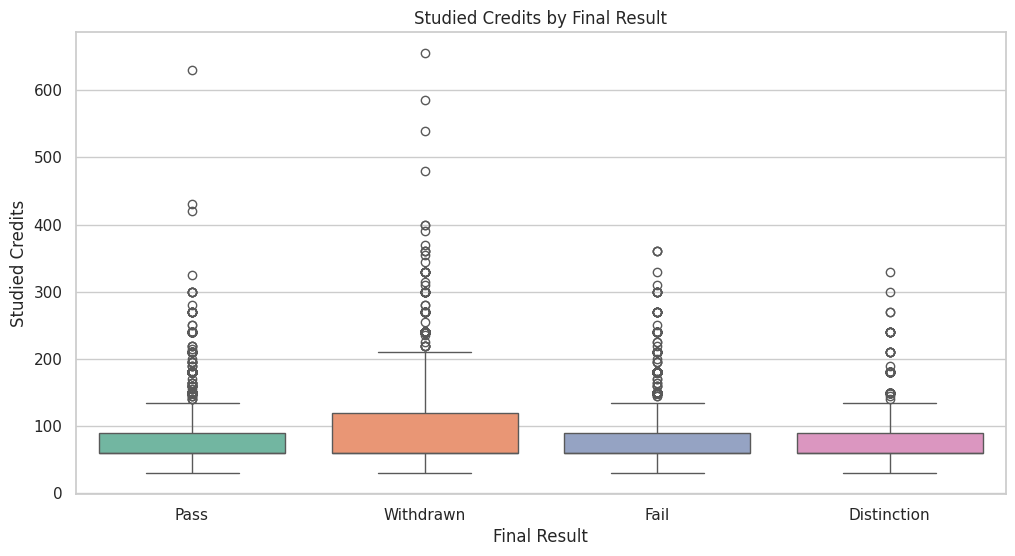

In [43]:
# Set the visualization style
sns.set(style="whitegrid")

# Plot box plot with different colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='final_result', y='studied_credits', data=student_info, hue='final_result', palette='Set2', dodge=False)
plt.title('Studied Credits by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Studied Credits')
plt.show()

The box plot compares studied credits across four categories of final results: Pass, Withdrawn, Fail, and Distinction. The ‘Pass’ category shows more variability in credits studied, while ‘Distinction’ students study fewer credits but more efficiently. ‘Withdrawn’ and ‘Fail’ categories have similar medians but differ in variability. Overall, the plot provides insights into student performance and credit distribution.

The ‘Pass’ category has a wider IQR, indicating more variability in studied credits compared to other categories.
The ‘Distinction’ category has the highest median value, suggesting that students achieving distinction study fewer credits but perhaps more efficiently.
‘Withdrawn’ and ‘Fail’ categories have similar medians, both lower than ‘Pass’ and ‘Distinction,’ but ‘Withdrawn’ shows more variability.

EXCEL 5

studentRegistration

In [44]:
#Fifth file
student_registration = pd.read_csv('studentRegistration.csv')

In [45]:
print(student_registration.head())

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  


code_module: Course module code (e.g., "AAA")

code_presentation: Presentation code (e.g., "2013J")

id_student: Student identification number

date_registration: Number of days since the start of the module when the student registered. Most students seem to register well before the start date of the module.

date_unregistration: Number of days since the start of the module when the student unregistered (NaN if the student did not unregister)
Not a common occurrence, as indicated by the NaN values in the date_unregistration column.

In [46]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


It shows that almost 1/3 of students are unregistered


In [47]:
# Check for missing values
print(student_registration.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [48]:
student_registration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


The majority of students register before the start of the module, with a median of 57 days before the module begins.

Some students register very early, up to 322 days before the module starts, while others register after the module has begun (up to 167 days later).

Unregistration typically occurs after the module starts, with a median of 27 days.
There is significant variability in unregistration timing, with some students unregistering up to 365 days before or 444 days after the module start.

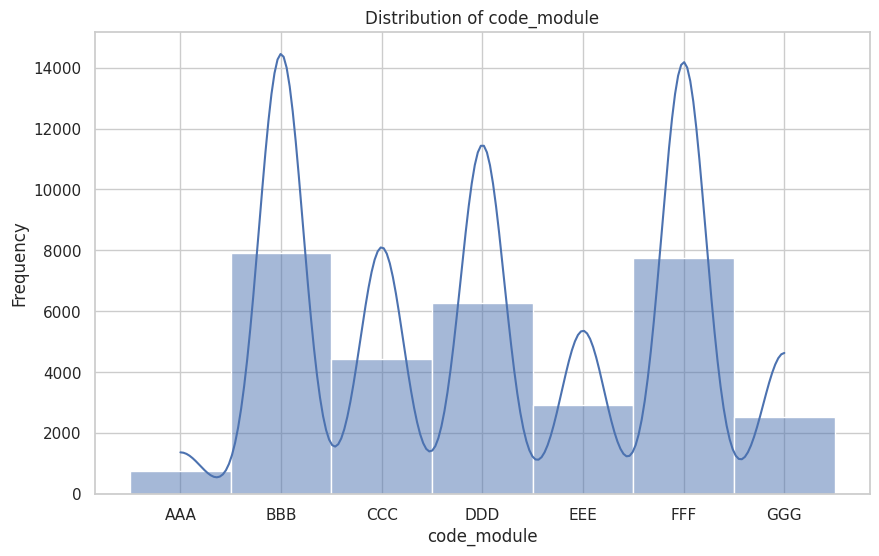

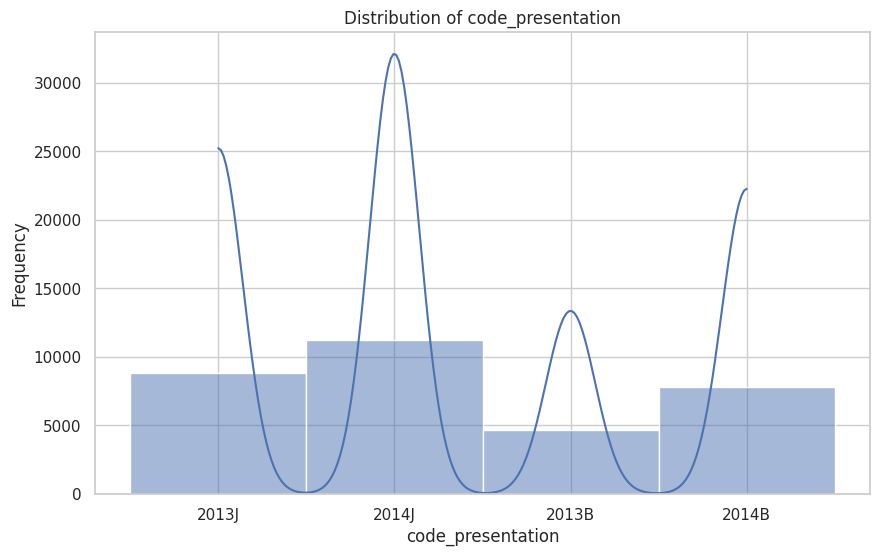

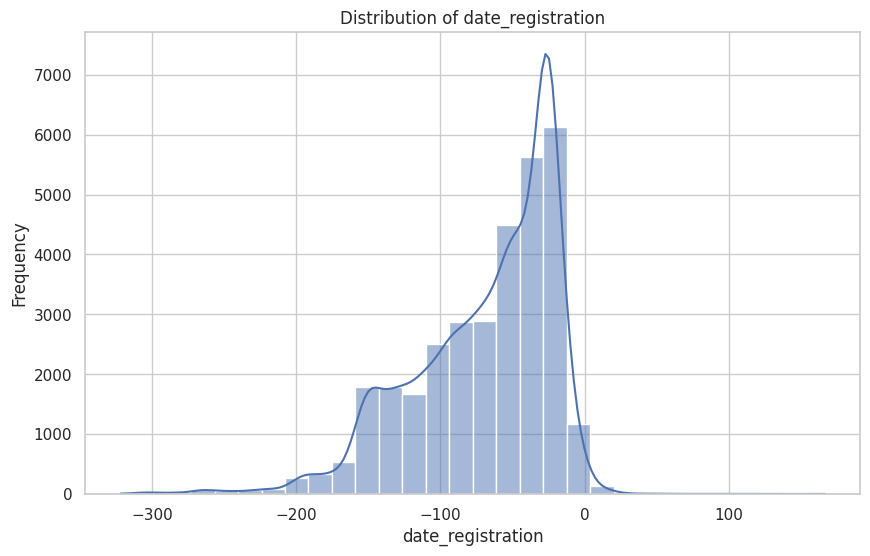

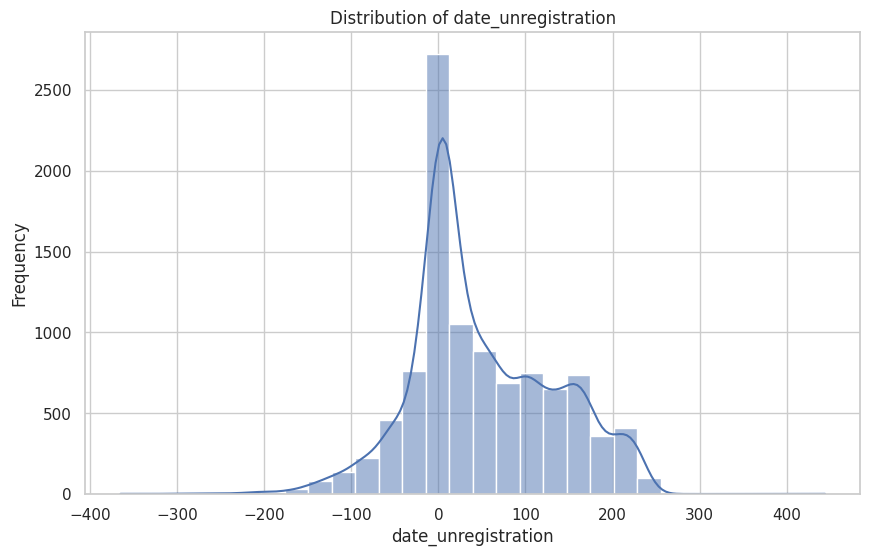

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
value_columns = ['code_module', 'code_presentation', 'date_registration','date_unregistration']

# Loop through each column and create a distribution plot
for column in value_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(student_registration[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Code Module Distribution: Shows varying frequency distributions across different modules.

Code Presentation Distribution: Reveals the frequency of course presentations over different years.


Date Registration Distribution: Highlights when students typically register, with most registrations occurring closer to the course start date.

The most unregistration is in the date that course starts.

In [50]:
student_registration.drop(['date_unregistration','date_registration'],axis = 1).groupby(['code_module','code_presentation']).count()

id_student
code_module code_presentation            
AAA         2013J                     383
            2014J                     365
BBB         2013B                    1767
            2013J                    2237
            2014B                    1613
            2014J                    2292
CCC         2014B                    1936
            2014J                    2498
DDD         2013B                    1303
            2013J                    1938
            2014B                    1228
            2014J                    1803
EEE         2013J                    1052
            2014B                     694
            2014J                    1188
FFF         2013B                    1614
            2013J                    2283
            2014B                    1500
            2014J                    2365
GGG         2013J                     952
            2014B                     833
            2014J                     749

This detailed view provides an understanding of the popularity and trends of different course modules over various years, helping to inform decisions about course offerings and resource allocation.

EXCEL 6

studentVle

In [51]:
#Sixth file
student_vle = pd.read_csv('studentVle.csv')
print(student_vle)
print('===='*30)
student_vle.info()

         code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeInde

The dataset consists of 10,655,280 entries with six columns: code_module, code_presentation, id_student, id_site, date, and sum_click. The id_student and id_site columns have large ranges, with means around 733,334 and 738,323, respectively. The date column has a mean of approximately 95.17 days, while the sum_click column, indicating the number of clicks, has a mean of 3.72 with a significant variance (standard deviation of 8.85). The dataset uses substantial memory, about 487.8 MB, highlighting its large size.

In [52]:
student_vle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


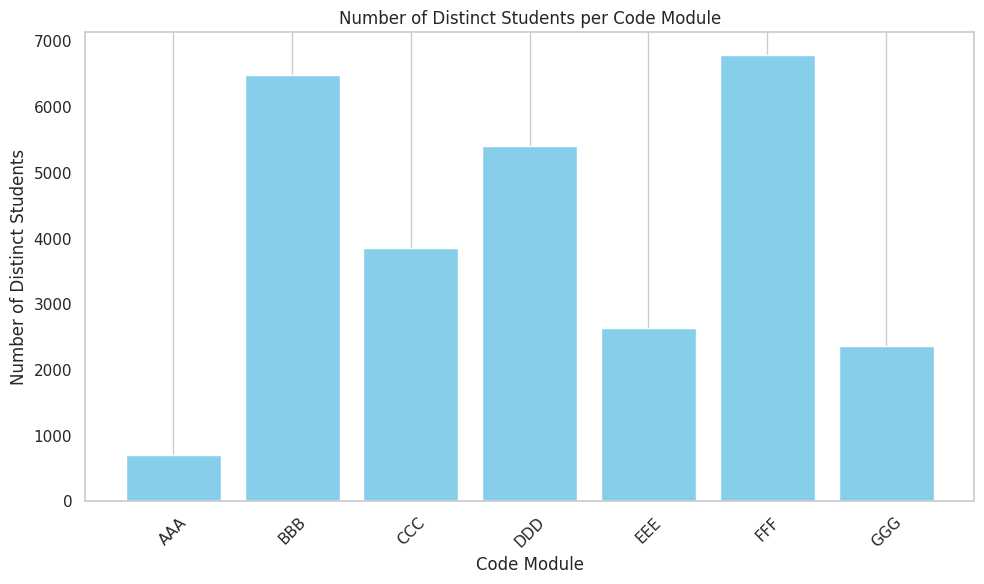

In [53]:
# Calculate the number of distinct id_student in each distinct code_module
distinct_students = student_vle.groupby('code_module')['id_student'].nunique().reset_index()
distinct_students.columns = ['code_module', 'num_distinct_students']

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(distinct_students['code_module'], distinct_students['num_distinct_students'], color='skyblue')
plt.xlabel('Code Module')
plt.ylabel('Number of Distinct Students')
plt.title('Number of Distinct Students per Code Module')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

The bar chart displays the number of distinct students per code module, highlighting significant variation among the modules. Module BBB and FFF have the highest student counts, each exceeding 6,000, while AAA has the lowest with under 1,000 students. Modules DDD and CCC follow, both having over 4,000 students, indicating a moderate level of student engagement. Modules EEE and GGG have lower student counts, each under 4,000, suggesting comparatively less participation. The chart effectively illustrates the distribution of student engagement across different code modules.

In [54]:
# Calculate the number of distinct id_site
num_distinct_sites = student_vle['id_site'].nunique()
print(f'Number of distinct id_site: {num_distinct_sites}')

# Calculate the frequency of each id_site
site_frequency = student_vle['id_site'].value_counts().reset_index()
site_frequency.columns = ['id_site', 'frequency']

# Print the frequency of each id_site
print(site_frequency)

Number of distinct id_site: 6268
      id_site  frequency
0      882537     157590
1      716238     156399
2      716216     139057
3      882545     132508
4      909013     126527
...       ...        ...
6263   877206          1
6264   877207          1
6265   877208          1
6266   877212          1
6267   768546          1

[6268 rows x 2 columns]


  code_module  total_sum_click
0         AAA          1246652
1         BBB          5234176
2         CCC          4682149
3         DDD          5530089
4         EEE          3984227
5         FFF         17593922
6         GGG          1333884


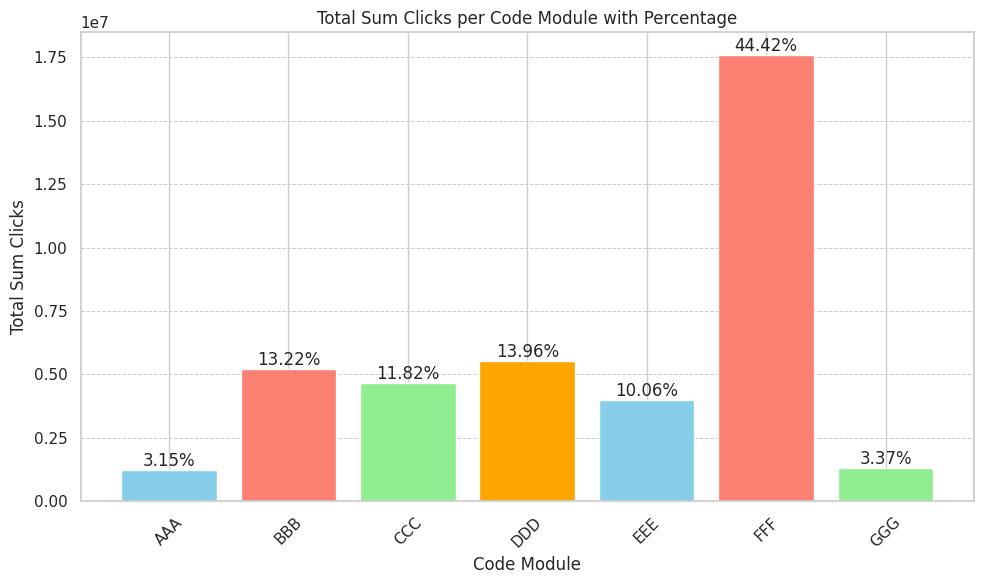

In [55]:
# Calculate the sum of sum_click for each code_module
sum_clicks = student_vle.groupby('code_module')['sum_click'].sum().reset_index()
sum_clicks.columns = ['code_module', 'total_sum_click']

# Print the result
print(sum_clicks)

# Calculate the percentage for each code_module
total_clicks = sum_clicks['total_sum_click'].sum()
sum_clicks['percentage'] = (sum_clicks['total_sum_click'] / total_clicks) * 100

# Plot the results
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']  # 4 different colors

plt.figure(figsize=(10, 6))
bars = plt.bar(sum_clicks['code_module'], sum_clicks['total_sum_click'], color=colors)

# Annotate each bar with the percentage
for bar, percentage in zip(bars, sum_clicks['percentage']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Code Module')
plt.ylabel('Total Sum Clicks')
plt.title('Total Sum Clicks per Code Module with Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

The graph illustrates click distribution across seven code modules, revealing stark differences in usage. Module FFF stands out as the clear leader, commanding nearly half of all clicks at 44.42%. This is followed by a middle tier of modules (DDD, BBB, and CCC) each garnering between 11% to 14% of clicks. EEE and AAA show lower engagement levels, while GGG trails significantly with just 3.37% of total clicks. This distribution suggests a heavy reliance on FFF, potentially indicating its critical functionality or user preference, while also highlighting opportunities for improvement or reevaluation of less-used modules, particularly GGG.

Sum of sum_click for each code_presentation:
  code_presentation  sum_click  percentage
0             2013B    6955433   17.561963
1             2013J   10945847   27.637469
2             2014B    7903521   19.955817
3             2014J   13800298   34.844751
Total sum_click: 39605099


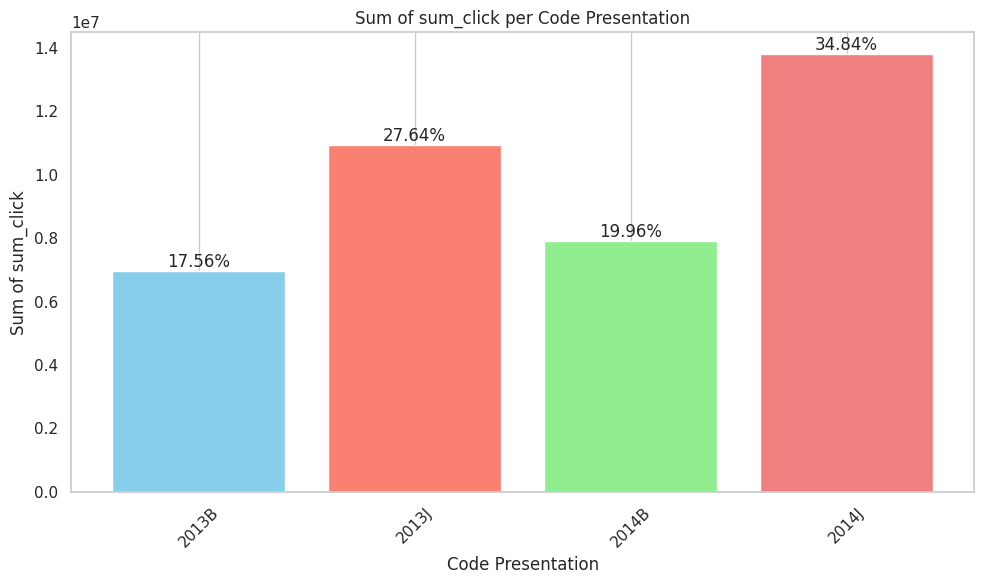

In [56]:
# Calculate sum of sum_click for each code_presentation
sum_click_per_presentation = student_vle.groupby('code_presentation')['sum_click'].sum().reset_index()

# Print the result with percentages
total_sum_click = sum_click_per_presentation['sum_click'].sum()
sum_click_per_presentation['percentage'] = (sum_click_per_presentation['sum_click'] / total_sum_click) * 100

print("Sum of sum_click for each code_presentation:")
print(sum_click_per_presentation)
print(f"Total sum_click: {total_sum_click}")

# Plotting the result
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']  # 4 different colors for each column
plt.bar(sum_click_per_presentation['code_presentation'], sum_click_per_presentation['sum_click'],
        color=colors)
plt.xlabel('Code Presentation')
plt.ylabel('Sum of sum_click')
plt.title('Sum of sum_click per Code Presentation')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Displaying the percentages on top of each bar
for i, val in enumerate(sum_click_per_presentation['sum_click']):
    plt.text(i, val + 1, f"{sum_click_per_presentation['percentage'].iloc[i]:.2f}%", ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

The bar chart illustrates the total sum of clicks (sum_click) for each code presentation, with each bar representing a different presentation year. The presentation 2014J has the highest sum of clicks at 34.84%, indicating the most student activity. The presentations 2013J and 2014B follow, contributing 27.64% and 19.96% respectively. 2013B has the lowest sum of clicks at 17.56%. This distribution suggests that student engagement, as measured by clicks, was highest in the later presentations, particularly in 2014J.

In [57]:
student_vle.drop(["date",'id_student',"sum_click"],axis = 1).groupby(['code_module','code_presentation']).count()

id_site
code_module code_presentation         
AAA         2013J               180982
            2014J               169316
BBB         2013B               403266
            2013J               452638
            2014B               273236
            2014J               438424
CCC         2014B               496181
            2014J               711646
DDD         2013B               536837
            2013J               680806
            2014B               379942
            2014J               568901
EEE         2013J               356262
            2014B               202224
            2014J               402947
FFF         2013B               946765
            2013J              1172101
            2014B               685274
            2014J              1210359
GGG         2013J               145995
            2014B               123319
            2014J               117859

EXCEL 7

vle


In [58]:
#Seventh file
vle = pd.read_csv('vle.csv')
print(vle)
print('===='*30)
vle.info()

      id_site code_module code_presentation activity_type  week_from  week_to
0      546943         AAA             2013J      resource        NaN      NaN
1      546712         AAA             2013J     oucontent        NaN      NaN
2      546998         AAA             2013J      resource        NaN      NaN
3      546888         AAA             2013J           url        NaN      NaN
4      547035         AAA             2013J      resource        NaN      NaN
...       ...         ...               ...           ...        ...      ...
6359   897063         GGG             2014J      resource        NaN      NaN
6360   897109         GGG             2014J      resource        NaN      NaN
6361   896965         GGG             2014J     oucontent        NaN      NaN
6362   897060         GGG             2014J      resource        NaN      NaN
6363   897100         GGG             2014J      resource        NaN      NaN

[6364 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
R

The vle DataFrame contains the following columns:
•	id_site: The identifier for the VLE (Virtual Learning Environment) activity.
•	code_module: The code for the module/course.
•	code_presentation: The code for the presentation/semester.
•	activity_type: The type of activity (e.g., resource, oucontent, url).
•	week_from: The week from which the material is planned to be used.
•	week_to: Week until which the material is planned to be used.

In [59]:
print(vle.head())

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN


In [60]:
# Check for missing values
print(vle.isnull().sum())

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [61]:
# Create DataFrame
vle = pd.DataFrame(vle)

import plotly.graph_objects as go
# Group by code_module and aggregate the activity_type
activity_types_by_module = vle.groupby('code_module')['activity_type'].unique().reset_index()

# Convert array of activity types to abstract descriptions
activity_types_by_module['activity_abstract'] = activity_types_by_module['activity_type'].apply(lambda x: ', '.join(x))

# Drop the original activity_type column
activity_types_by_module.drop(columns=['activity_type'], inplace=True)

# Create Plotly Table
fig = go.Figure(data=[go.Table(
    header=dict(values=list(activity_types_by_module.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[activity_types_by_module.code_module, activity_types_by_module.activity_abstract],
               fill_color='lavender',
               align='left'))
])

# Show the table
fig.show()

This table helps to quickly understand the variety and types of activities that are used in each module, providing insight into how different modules engage students with various online activities.

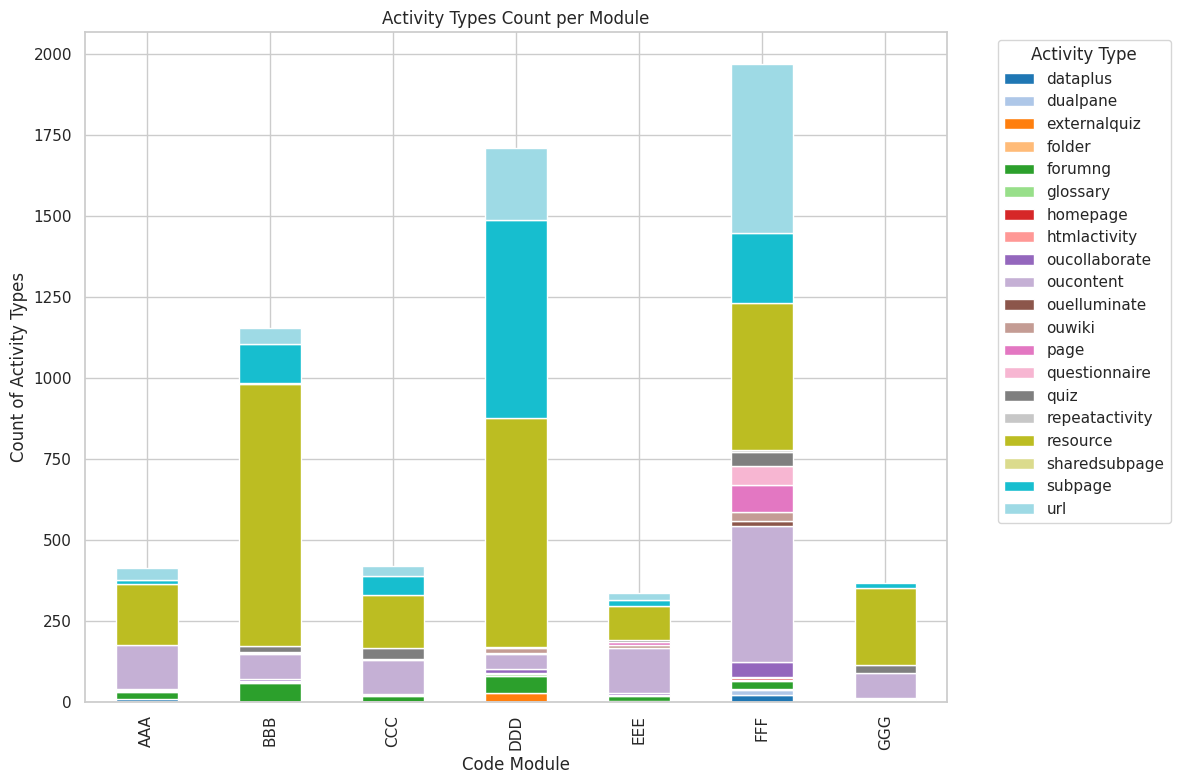

In [62]:
# Remove any leading/trailing whitespace from column names
vle.columns = vle.columns.str.strip()

# Group by code_module and count each activity_type
activity_counts = vle.groupby(['code_module', 'activity_type']).size().unstack(fill_value=0)

# Plot the data
activity_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Activity Types Count per Module')
plt.xlabel('Code Module')
plt.ylabel('Count of Activity Types')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

The bar chart "Activity Types Count per Module" visualizes the distribution of different activity types across various code modules. Each bar represents a module, and the different colors within the bars correspond to different activity types.

# **Data Preprocessing And Feature Engeering**

The data were preprocessed while using the OULAD dataset for model validation. First, samples with incorrect date fields were removed; then all course lengths were standardized to 270 days. In addition, to reduce the dimensionality and complexity of the model, integer encoding was used instead of the classification data in the demographic data. Finally, the clickstream data, assessment scores, and coded demographic data were concatenated to form the training data for the model.

In [63]:
# Merge "assessments" and "student_assessment" datasets on 'id_assessment'
merged_assessments_tbls = pd.merge(assessments, student_assessment, on='id_assessment').fillna(0)
merged_assessments_tbls

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [64]:
# Merge merged_assessments_tbls with student_info on 'code_module', 'code_presentation', and 'id_student'
merged_student_assessments_ds = pd.merge(student_info, merged_assessments_tbls, on=['code_module', 'code_presentation', 'id_student'], how='left').fillna(0)

# Drop the columns "date" and "date_submitted"
merged_student_assessments_ds = merged_student_assessments_ds.drop(columns=['date', 'date_submitted'])

# Display the DataFrame
merged_student_assessments_ds

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,assessment_type,weight,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752.0,TMA,10.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753.0,TMA,20.0,0.0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754.0,TMA,20.0,0.0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755.0,TMA,20.0,0.0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756.0,TMA,30.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180657,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37440.0,CMA,0.0,0.0,100.0
180658,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37441.0,CMA,0.0,0.0,100.0
180659,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37435.0,TMA,0.0,0.0,80.0
180660,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37436.0,TMA,0.0,0.0,80.0


In [65]:
# Group by 'code_module', 'code_presentation', and 'id_student', and calculate the mean of 'score' and 'weight'
merged_student_assessments_reshaped_ds = merged_student_assessments_ds.groupby(['code_module', 'code_presentation', 'id_student']).agg({
    # Include other columns you want to keep
    'gender': 'first',
    'region': 'first',
    'highest_education': 'first',
    'imd_band': 'first',
    'age_band': 'first',
    'imd_band': 'first',
    'num_of_prev_attempts': 'first',
    'studied_credits': 'first',
    'disability': 'first',
    'final_result': 'first',
    'assessment_type': 'first',
    'is_banked': 'first',
    # mean of "score" and "weight"
    'score': 'mean',
    'weight': 'mean',
}).reset_index()

# Display the reshaped dataset
merged_student_assessments_reshaped_ds

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,assessment_type,is_banked,score,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,TMA,0.0,66.400000,20.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,0,0.0,0.000000,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,TMA,0.0,76.000000,20.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,TMA,0.0,54.400000,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0,0.0,0.000000,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,CMA,0.0,88.111111,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,CMA,0.0,76.666667,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,CMA,0.0,91.500000,0.0


In [66]:
# Merge courses with student_vle on 'code_module', 'code_presentation'
merged_courses_vle = pd.merge(student_vle, courses, on=['code_module', 'code_presentation']).fillna(0)

# Calculate the sum of clicks for each student on each day
daily_clicks = merged_courses_vle.groupby(['id_student', 'date']).agg({
    'sum_click': 'sum',
    'code_module': 'first',
    'code_presentation': 'first',
    'module_presentation_length': 'first'
}).reset_index()

# Rename the column to be more descriptive
daily_clicks.rename(columns={'sum_click': 'daily_sum_clicks'}, inplace=True)

# Show the final dataframe
daily_clicks

,id_student,date,daily_sum_clicks,code_module,code_presentation,module_presentation_length
0,6516,-23,28,AAA,2014J,269
1,6516,-22,82,AAA,2014J,269
2,6516,-20,41,AAA,2014J,269
3,6516,-17,7,AAA,2014J,269
4,6516,-12,2,AAA,2014J,269
...,...,...,...,...,...,...
1737002,2698588,240,3,BBB,2014J,262
1737003,2698588,244,3,BBB,2014J,262
1737004,2698588,248,5,BBB,2014J,262
1737005,2698588,250,2,BBB,2014J,262


In [67]:
# Drop rows where the 'date' column has negative values
daily_clicks = daily_clicks[daily_clicks['date'] >= 0]

# Show the final dataframe
daily_clicks

,id_student,date,daily_sum_clicks,code_module,code_presentation,module_presentation_length
9,6516,0,71,AAA,2014J,269
10,6516,1,45,AAA,2014J,269
11,6516,2,60,AAA,2014J,269
12,6516,3,17,AAA,2014J,269
13,6516,5,23,AAA,2014J,269
...,...,...,...,...,...,...
1737002,2698588,240,3,BBB,2014J,262
1737003,2698588,244,3,BBB,2014J,262
1737004,2698588,248,5,BBB,2014J,262
1737005,2698588,250,2,BBB,2014J,262


In [68]:
# Calculate the maximum course length
max_course_length = merged_courses_vle['module_presentation_length'].max()
max_course_length

269

In [69]:
# Get unique students and create a DataFrame of all possible date values
students = daily_clicks['id_student'].unique()
all_dates = pd.DataFrame({'date': range(0, max_course_length + 1)})

# Create a MultiIndex of all combinations of students and dates
multi_index = pd.MultiIndex.from_product([students, all_dates['date']], names=['id_student', 'date'])

# Reindex the daily_clicks DataFrame to this MultiIndex, filling missing values
expanded_daily_clicks = daily_clicks.set_index(['id_student', 'date']).reindex(multi_index).reset_index()

# Fill missing values for daily_sum_clicks with 0
expanded_daily_clicks['daily_sum_clicks'] = expanded_daily_clicks['daily_sum_clicks'].fillna(0)

# Propagate columns code_module, code_presentation, and module_presentation_length
expanded_daily_clicks[['code_module', 'code_presentation', 'module_presentation_length']] = (
    expanded_daily_clicks.groupby('id_student')[['code_module', 'code_presentation', 'module_presentation_length']].ffill().bfill()
)
# Show the final expanded dataframe
expanded_daily_clicks

,id_student,date,daily_sum_clicks,code_module,code_presentation,module_presentation_length
0,6516,0,71.0,AAA,2014J,269.0
1,6516,1,45.0,AAA,2014J,269.0
2,6516,2,60.0,AAA,2014J,269.0
3,6516,3,17.0,AAA,2014J,269.0
4,6516,4,0.0,AAA,2014J,269.0
...,...,...,...,...,...,...
6889315,2698588,265,0.0,BBB,2014J,262.0
6889316,2698588,266,0.0,BBB,2014J,262.0
6889317,2698588,267,0.0,BBB,2014J,262.0
6889318,2698588,268,0.0,BBB,2014J,262.0


In [70]:
# Merge the datasets on 'code_module', 'code_presentation', and 'id_student'
final_merged_data = pd.merge(
    merged_student_assessments_reshaped_ds,
    expanded_daily_clicks,
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

# Show the final merged dataframe
final_merged_data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,assessment_type,is_banked,score,weight,date,daily_sum_clicks,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0,0.0,49.0,268.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0,1.0,127.0,268.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0,2.0,4.0,268.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0,3.0,0.0,268.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,TMA,0.0,82.000000,20.0,4.0,0.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893470,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,CMA,0.0,82.857143,0.0,265.0,0.0,269.0
6893471,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,CMA,0.0,82.857143,0.0,266.0,0.0,269.0
6893472,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,CMA,0.0,82.857143,0.0,267.0,0.0,269.0
6893473,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,CMA,0.0,82.857143,0.0,268.0,0.0,269.0


In [71]:
# Define the desired column order
column_order = [
    "id_student", "code_module", "code_presentation", "date", "module_presentation_length",
    "gender", "age_band", "disability", "region", "highest_education", "imd_band",
    "num_of_prev_attempts", "studied_credits", "assessment_type", "is_banked",
    "daily_sum_clicks", "weight", "score", "final_result"
]

# Reorder columns in the reshaped dataset
final_merged_data = final_merged_data[column_order]

# Display the final dataset with reordered columns
final_merged_data

,id_student,code_module,code_presentation,date,module_presentation_length,gender,age_band,disability,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,assessment_type,is_banked,daily_sum_clicks,weight,score,final_result
0,11391,AAA,2013J,0.0,268.0,M,55<=,N,East Anglian Region,HE Qualification,90-100%,0,240,TMA,0.0,49.0,20.0,82.000000,Pass
1,11391,AAA,2013J,1.0,268.0,M,55<=,N,East Anglian Region,HE Qualification,90-100%,0,240,TMA,0.0,127.0,20.0,82.000000,Pass
2,11391,AAA,2013J,2.0,268.0,M,55<=,N,East Anglian Region,HE Qualification,90-100%,0,240,TMA,0.0,4.0,20.0,82.000000,Pass
3,11391,AAA,2013J,3.0,268.0,M,55<=,N,East Anglian Region,HE Qualification,90-100%,0,240,TMA,0.0,0.0,20.0,82.000000,Pass
4,11391,AAA,2013J,4.0,268.0,M,55<=,N,East Anglian Region,HE Qualification,90-100%,0,240,TMA,0.0,0.0,20.0,82.000000,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893470,2684003,GGG,2014J,265.0,269.0,F,35-55,N,Yorkshire Region,HE Qualification,50-60%,0,30,CMA,0.0,0.0,0.0,82.857143,Distinction
6893471,2684003,GGG,2014J,266.0,269.0,F,35-55,N,Yorkshire Region,HE Qualification,50-60%,0,30,CMA,0.0,0.0,0.0,82.857143,Distinction
6893472,2684003,GGG,2014J,267.0,269.0,F,35-55,N,Yorkshire Region,HE Qualification,50-60%,0,30,CMA,0.0,0.0,0.0,82.857143,Distinction
6893473,2684003,GGG,2014J,268.0,269.0,F,35-55,N,Yorkshire Region,HE Qualification,50-60%,0,30,CMA,0.0,0.0,0.0,82.857143,Distinction


In [72]:
# Save the merged dataset to a CSV file
final_merged_data.to_csv('final_merged_data.csv', index=False)

In [73]:
final_merged_data = pd.read_csv('final_merged_data.csv')
# List of categorical features to encode
categorical_features = ['gender', 'age_band', 'disability', 'region', 'highest_education', 'assessment_type', 'final_result', 'imd_band', 'code_module']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical feature
for feature in categorical_features:
    final_merged_data[feature] = label_encoder.fit_transform(final_merged_data[feature])

# Show the final encoded dataset
print(final_merged_data.head())

   id_student  code_module code_presentation  date  \
0       11391            0             2013J   0.0   
1       11391            0             2013J   1.0   
2       11391            0             2013J   2.0   
3       11391            0             2013J   3.0   
4       11391            0             2013J   4.0   

   module_presentation_length  gender  age_band  disability  region  \
0                       268.0       1         2           0       0   
1                       268.0       1         2           0       0   
2                       268.0       1         2           0       0   
3                       268.0       1         2           0       0   
4                       268.0       1         2           0       0   

   highest_education  imd_band  num_of_prev_attempts  studied_credits  \
0                  1        10                     0              240   
1                  1        10                     0              240   
2                  1        1

In [74]:
# Save the merged dataset to a CSV file
final_merged_data.to_csv('final_merged_data.csv', index=False)

**Check for NaN values**

In [75]:
processed_data = pd.read_csv('final_merged_data.csv')
# Check for NaN values in the entire DataFrame
nan_summary = final_merged_data.isna().sum()

# Filter columns with NaN values
nan_columns = nan_summary[nan_summary > 0]

# Display columns with NaN values and the count of NaN values
print("Columns with NaN values:")
print(nan_columns)

# Optionally, display the rows with NaN values for further inspection
rows_with_nan = final_merged_data[final_merged_data.isna().any(axis=1)]
print("\nRows with NaN values:")
print(rows_with_nan)

# Save the summary to a CSV file
nan_columns.to_csv('nan_summary.csv', header=['NaN Count'])

Columns with NaN values:
date                          4155
module_presentation_length    4155
daily_sum_clicks              4155
dtype: int64

Rows with NaN values:
         id_student  code_module code_presentation  date  \
31834        292923            0             2013J   NaN   
34413        305539            0             2013J   NaN   
50194        405961            0             2013J   NaN   
64418       1763015            0             2013J   NaN   
75212       2318055            0             2013J   NaN   
...             ...          ...               ...   ...   
6858640      688663            6             2014J   NaN   
6878621      696711            6             2014J   NaN   
6880512      697456            6             2014J   NaN   
6884833     1890660            6             2014J   NaN   
6887534     2239862            6             2014J   NaN   

         module_presentation_length  gender  age_band  disability  region  \
31834                           NaN 

**Drop NaN Values**

In [76]:
# Check for NaN values in the entire DataFrame
nan_summary = processed_data.isna().sum()

# Filter columns with NaN values
nan_columns = nan_summary[nan_summary > 0]

# Display columns with NaN values and the count of NaN values
print("Columns with NaN values:")
print(nan_columns)

# Drop rows with NaN values
final_merged_data_cleaned = processed_data.dropna()

# Display the cleaned dataset
print("\nCleaned dataset without NaN values:")
print(final_merged_data_cleaned.head())

# Save the cleaned dataset to a CSV file
final_merged_data_cleaned.to_csv('final_cleaned_data.csv', index=False)

# Optional: Verify that there are no NaN values left
nan_summary_cleaned = final_merged_data_cleaned.isna().sum()
print("\nNaN values in cleaned dataset:")
print(nan_summary_cleaned)

Columns with NaN values:
date                          4155
module_presentation_length    4155
daily_sum_clicks              4155
dtype: int64

Cleaned dataset without NaN values:
   id_student  code_module code_presentation  date  \
0       11391            0             2013J   0.0   
1       11391            0             2013J   1.0   
2       11391            0             2013J   2.0   
3       11391            0             2013J   3.0   
4       11391            0             2013J   4.0   

   module_presentation_length  gender  age_band  disability  region  \
0                       268.0       1         2           0       0   
1                       268.0       1         2           0       0   
2                       268.0       1         2           0       0   
3                       268.0       1         2           0       0   
4                       268.0       1         2           0       0   

   highest_education  imd_band  num_of_prev_attempts  studied_credit